In [333]:
import pandas as pd


In [342]:
data=pd.read_csv("data_rand_backup.txt",sep=";",names=("run","p","n","sample_size","method","tp","tn","fp","fn"))

In [343]:
data["accuracy"]=(data.tp+data.tn)/(data.tp+data.tn+data.fp+data.fn)
data["percision"]=(data.tp)/(data.tp+data.fp)
data["recall"]=(data.tp)/(data.tp+data.fn)
data["f1"]=2*(data.percision*data.recall)/(data.percision+data.recall)
data["tpr"]=data.tp/(data.tp+data.fn)
data["fpr"]=data.fp/(data.fp+data.tn)


In [344]:
data["p2"]=(data["p"]-0.05).round(1)+0.05

In [345]:
data[["p","p2"]].sample(20)

,p,p2
209503,0.363362,0.35
2777,0.253307,0.25
111761,0.742375,0.75
304903,0.159932,0.15
316456,0.291657,0.25
47628,0.306210,0.35
177465,0.088933,0.05
282176,0.056875,0.05
43077,0.203779,0.25
286446,0.869547,0.85


In [ ]:
grouping_cols=["run","p2","n","method","sample_size"]

grouped=data.groupby(grouping_cols).agg(max_acc=('accuracy', 'max'), 
                               max_f1=('f1', 'max'))
grouped["auroc"]=data.groupby(grouping_cols).apply(compute_auroc)
grouped["auprc"]=data.groupby(grouping_cols).apply(compute_auprc)
grouped=grouped.reset_index()

grouped

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
fig, axs = plt.subplots(4, 2)
fig.set_figwidth(20)
fig.set_figheight(40)
for method,j in zip(["fitch","varadno"],[0,1]):    
    for i in [-1,100,1000,10000]:
        sample=grouped[(grouped.sample_size==i)&(grouped.method==method)]
        g=sample.groupby("p2").agg(av_max_acc=('max_acc', 'mean'), av_max_f1=('max_f1', 'mean'),
                                   av_auroc=("auroc","mean"),av_auprc=('auprc',"mean"))
        g=g.reset_index()

        for metric,k in zip(['av_max_acc','av_max_f1','av_auroc','av_auprc'],[0,1,2,3]):

            g.plot("p2",metric,label=method+str(i),ax=axs[k,j])

In [86]:
grouped

,run,p,n,method,sample_size,max_acc,max_f1
0,0,0.550771,5,fitch,-1,0.900000,0.900000
1,0,0.550771,5,fitch,10,0.600000,0.620690
2,0,0.550771,5,fitch,100,0.800000,0.750000
3,0,0.550771,5,fitch,1000,0.800000,0.818182
4,0,0.550771,5,fitch,10000,0.900000,0.900000
...,...,...,...,...,...,...,...
3906,431,0.384001,13,fitch,-1,0.705128,0.783019
3907,431,0.384001,13,fitch,100,0.608974,0.747967
3908,431,0.384001,13,varadno,-1,0.685897,0.767773
3909,431,0.384001,13,varadno,100,0.602564,0.746988


In [80]:
grouped=data.groupby(["run","p","n","sample_size"])

In [341]:
def compute_auroc(data):
    data=data.dropna()
    if (data.shape[0]<2):
        return 1
    data=data.sort_values(by="fpr")
    return(auc(data.fpr,data.tpr))
def compute_auprc(data):
    data=data.dropna()
    if (data.shape[0]<2):
        return 1
    data=data.sort_values(by="recall")
    return(auc(data.recall,data.percision))

In [151]:
from scipy import integrate
import numpy as np
from sklearn.metrics import auc

0.12752525252525254
0.6752670940170942


<AxesSubplot:xlabel='recall'>

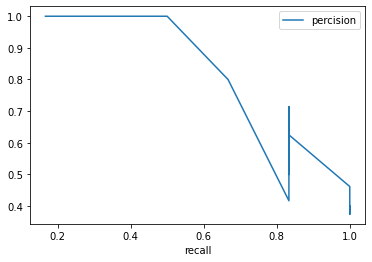

In [324]:
test=data[(data.run==429)&(data.sample_size==-1)&(data.method=="fitch")]
sample=test.dropna()

print(comupte_auroc(sample))

sample=sample.sort_values(by="recall")
print(auc(sample.recall,sample.percision))
sample.plot("recall","percision")

sample=sample.sort_values(by="fpr")
print(auc(sample.recall,sample.percision))
sample.plot("recall","percision")

In [248]:
sample.groupby("recall").agg(percision=('percision', 'mean'))

,percision
recall,
0.000000,NaN
0.034483,0.500000
0.103448,0.500000
0.172414,0.413152
0.206897,0.400000
0.517241,0.517241
0.758621,0.564103
0.793103,0.534884
0.862069,0.520833


In [289]:
grouped=data.groupby(["run","p2","n","method","sample_size"]).apply(compute_auroc)

In [290]:
grouped

run  p2    n   method   sample_size
0    0.55  5   fitch    -1             0.929293
                         10            0.409091
                         100           0.671717
                         1000          0.853535
                         10000         0.929293
                                         ...   
431  0.35  13  fitch    -1             0.702424
                         100           0.576122
               varadno  -1             0.714030
                         100           0.580645
                         1000          0.669141
Length: 3911, dtype: float64

In [319]:
data[data.p>0.9]

,run,p,n,sample_size,method,tp,tn,fp,fn,accuracy,percision,recall,f1,tpr,fpr,p2
19169,32,0.939152,10,-1,varadno,6,67,17,0,0.811111,0.260870,1.000000,0.413793,1.000000,0.202381,0.95
19170,32,0.939152,10,-1,varadno,6,67,17,0,0.811111,0.260870,1.000000,0.413793,1.000000,0.202381,0.95
19171,32,0.939152,10,-1,varadno,6,68,16,0,0.822222,0.272727,1.000000,0.428571,1.000000,0.190476,0.95
19172,32,0.939152,10,-1,varadno,6,68,16,0,0.822222,0.272727,1.000000,0.428571,1.000000,0.190476,0.95
19173,32,0.939152,10,-1,varadno,6,68,16,0,0.822222,0.272727,1.000000,0.428571,1.000000,0.190476,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275335,429,0.911739,9,10000,fitch,1,66,0,5,0.930556,1.000000,0.166667,0.285714,0.166667,0.000000,0.95
275336,429,0.911739,9,10000,fitch,1,66,0,5,0.930556,1.000000,0.166667,0.285714,0.166667,0.000000,0.95
275337,429,0.911739,9,10000,fitch,1,66,0,5,0.930556,1.000000,0.166667,0.285714,0.166667,0.000000,0.95
275338,429,0.911739,9,10000,fitch,1,66,0,5,0.930556,1.000000,0.166667,0.285714,0.166667,0.000000,0.95


In [ ]:
data[(data.run==32)&()]